In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.text import TextPath

In [18]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 1024], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([1024]), name='b1')
W2 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([1024]), name='b2')
W3 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W3')
b3 = tf.Variable(tf.random_normal([1024]), name='b3')
W4 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W4')
b4 = tf.Variable(tf.random_normal([1024]), name='b4')
W5 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W5')
b5 = tf.Variable(tf.random_normal([1024]), name='b5')
W7 = tf.Variable(tf.random_normal([1024, 10], stddev=0.03), name='W7')
b7 = tf.Variable(tf.random_normal([10]), name='b7')


L1 = tf.nn.relu(tf.add(tf.matmul(x, W1), b1))
L2 = tf.nn.relu(tf.add(tf.matmul(L1, W2), b2))
L3 = tf.nn.relu(tf.add(tf.matmul(L2, W3), b3))
L4 = tf.nn.relu(tf.add(tf.matmul(L3, W4), b4))
L5 = tf.nn.relu(tf.add(tf.matmul(L4, W5), b5))
Y = tf.nn.softmax(tf.add(tf.matmul(L5, W7), b7))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
y_clipped = tf.clip_by_value(Y, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cross_entropy)

Instructions for updating:
Use tf.cast instead.


In [0]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
images,labels=mnist.test.next_batch(batch_size=1000)

In [7]:
learning_rate = 0.01
epochs = 150
batch_size = 100
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
with tf.Session() as sess:
    # initialise the variables
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    total_batch = int(len(mnist.train.labels) / batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            _ , c = sess.run([optimiser, cross_entropy], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        if(epoch==0 or (epoch+1)%10==0):
            print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        if(epoch>=50 and epoch%20==0):
          learning_rate=learning_rate/2
          optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
        #print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    print("Test Accuracy: ",sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    output_layer,H5,H4,H3,H2,H1=sess.run([Y,L5,L4,L3,L2,L1], feed_dict={x: images})

Epoch: 1 cost = 2.195
Epoch: 10 cost = 0.292
Epoch: 20 cost = 0.159
Epoch: 30 cost = 0.093
Epoch: 40 cost = 0.052
Epoch: 50 cost = 0.040
Epoch: 60 cost = 0.014
Epoch: 70 cost = 0.007
Epoch: 80 cost = 0.005
Epoch: 90 cost = 0.004
Epoch: 100 cost = 0.004
Epoch: 110 cost = 0.003
Epoch: 120 cost = 0.003
Epoch: 130 cost = 0.003
Epoch: 140 cost = 0.003
Epoch: 150 cost = 0.003
Test Accuracy:  0.98


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """


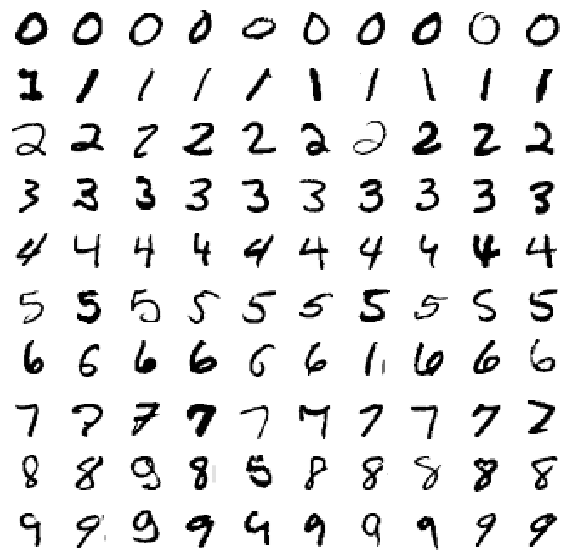

In [8]:
plt.figure(figsize=(10, 10))
for i in range(10):
  j=0
  for k in range(1000):
    if(pd.Series(output_layer[k,:]).argmax()==i ):
      plt.subplot(10, 10, (i*10)+j + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[k].reshape(28, 28))
      j=j+1
    if(j==10):
      break
plt.show()

Chosen Hidden Unit in last hidden layer: [708 884 612 883 598 581 935 774 662 299]


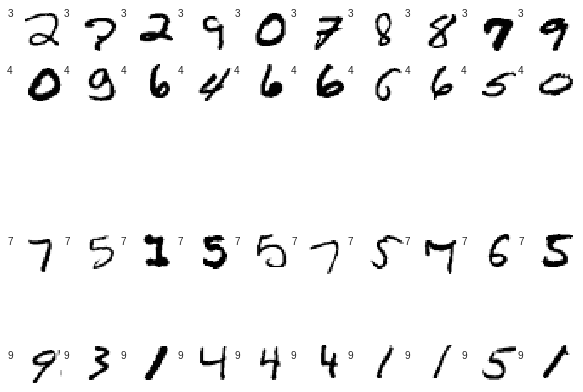

In [9]:
hidden_units=np.random.randint(0,1023, 10)
print("Chosen Hidden Unit in last hidden layer:",hidden_units)
plt.figure(figsize=(10, 10))
for i in range(10):
  j=0
  for k in range(1000):
    if(pd.Series(H5[k,hidden_units]).nlargest(1).index==i):
      plt.subplot(10, 10, (i*10) + j + 1)
      plt.xticks([])
      plt.yticks([i])
      plt.grid(False)
      plt.imshow(images[k].reshape(28, 28))
      j=j+1
      if(j==10):
        break
plt.show()

Compared to the image matrix we obtained for the output layer, here we see that all the dimensions do not produce an output. 6 out of 10 randomly chosed dimensions do not have a high probability value for any of the 1000 test images. However they could be a supportive unit for the subsequent layer. We also see that the output given by the hidden layer are erroneous. This is an expected outcome for the hidden layer as one additional step of dimensionality reduction and tranformation is pending.

In [0]:
def plot_func(data,title):
    plt.figure(figsize=(20, 8))

    pca = PCA(n_components=2)
    reduced_data=pca.fit_transform(data)
    reduced_data=pd.DataFrame(reduced_data.copy())
    reduced_data['label']=labels.argmax(axis=1)
    reduced_data.columns=['x','y','label']
    mean=[]
    plt.subplot(1, 2,  1)
    for i in range(10):
      mean.append(np.mean(reduced_data.loc[reduced_data.label==i,:]))

    plt.scatter(x=reduced_data.iloc[:,0], y=reduced_data.iloc[:,1],c=reduced_data.iloc[:,2],cmap=plt.get_cmap('Set1'),alpha=0.8,s=8 )
    for i,d in zip(range(10),mean):
        path = TextPath((0,0), str(int(d[2])))
        plt.plot(d[0],d[1],marker=path,markersize=25,color='Black')
    plt.title(title+"-PCA Transformed Features")

    ########
    plt.subplot(1, 2,  2)
    tsne = TSNE(n_components=2)
    reduced_data=pca.fit_transform(data)
    reduced_data=pd.DataFrame(reduced_data.copy())
    reduced_data['label']=labels.argmax(axis=1)
    reduced_data.columns=['x','y','label']
    mean=[]
    for i in range(10):
      mean.append(np.mean(reduced_data.loc[reduced_data.label==i,:]))

    plt.scatter(x=reduced_data.iloc[:,0], y=reduced_data.iloc[:,1],c=reduced_data.iloc[:,2],cmap=plt.get_cmap('Set1'),alpha=0.8,s=8 )
    for i,d in zip(range(10),mean):
        path = TextPath((0,0), str(int(d[2])))
        plt.plot(d[0],d[1],marker=path,markersize=25,color='Black')
    plt.title(title+"t-SNE Transformed Features")
    plt.show()

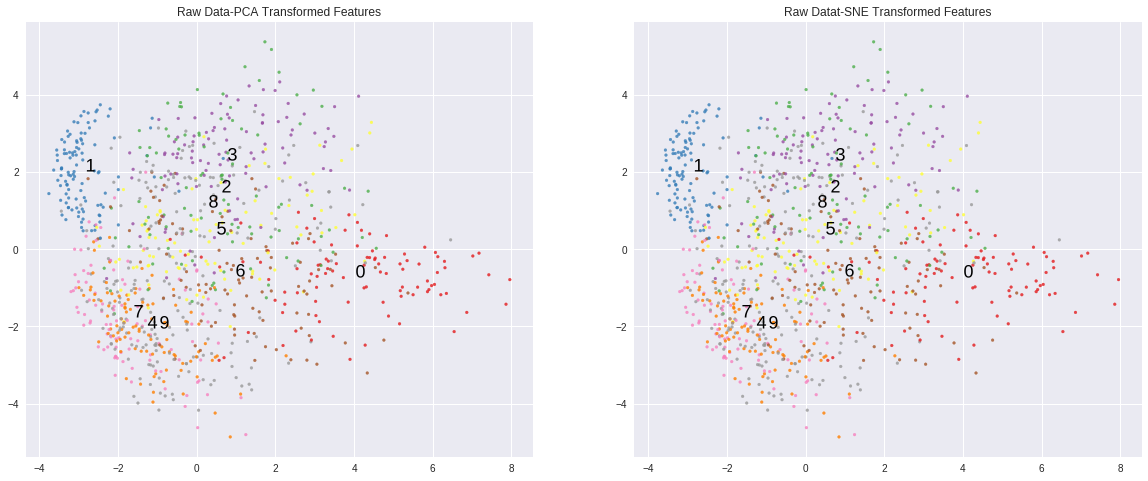

In [11]:
plot_func(images,"Raw Data")

The raw image data is very difficult to demarcate. There is a lot of overlap.

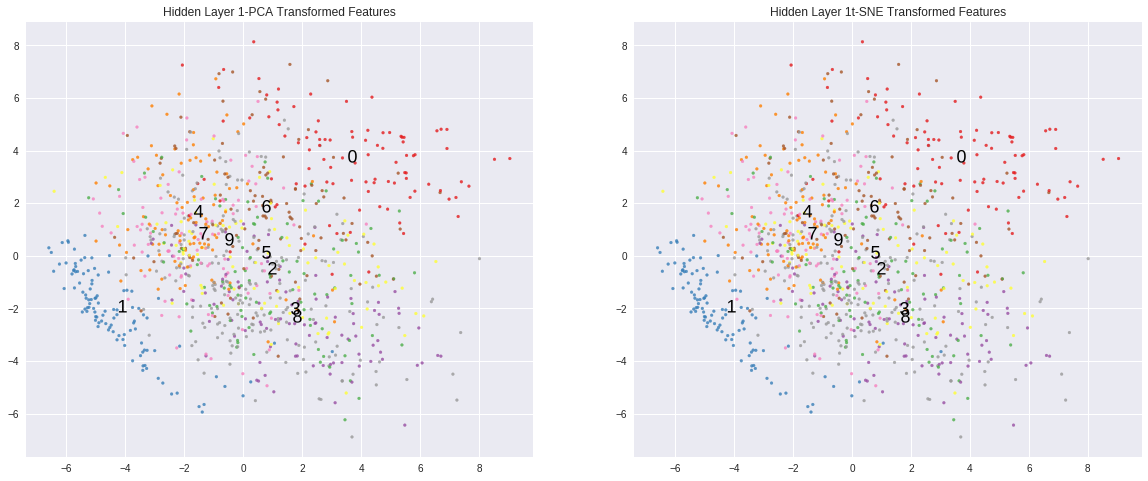

In [12]:
plot_func(H1,"Hidden Layer 1")

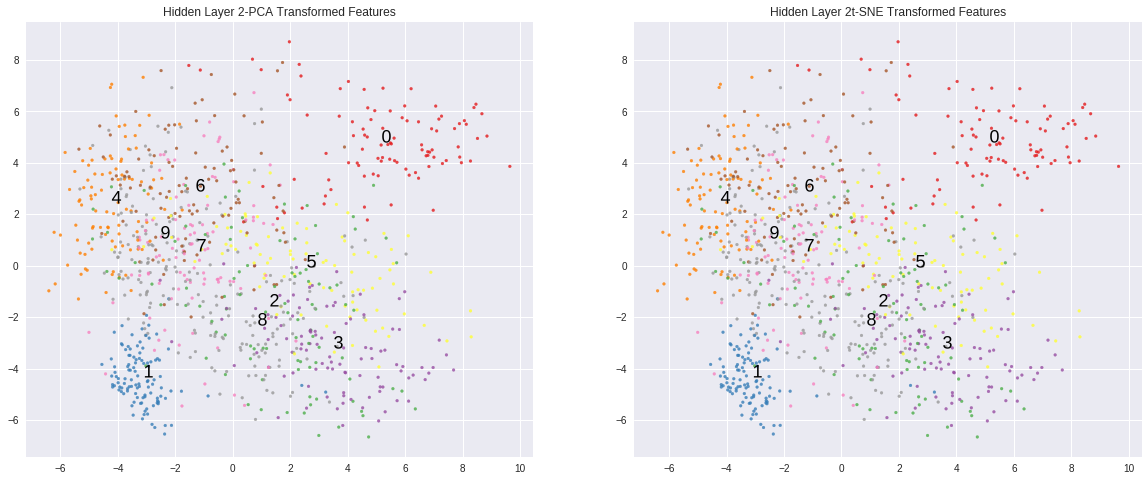

In [13]:
plot_func(H2,"Hidden Layer 2")

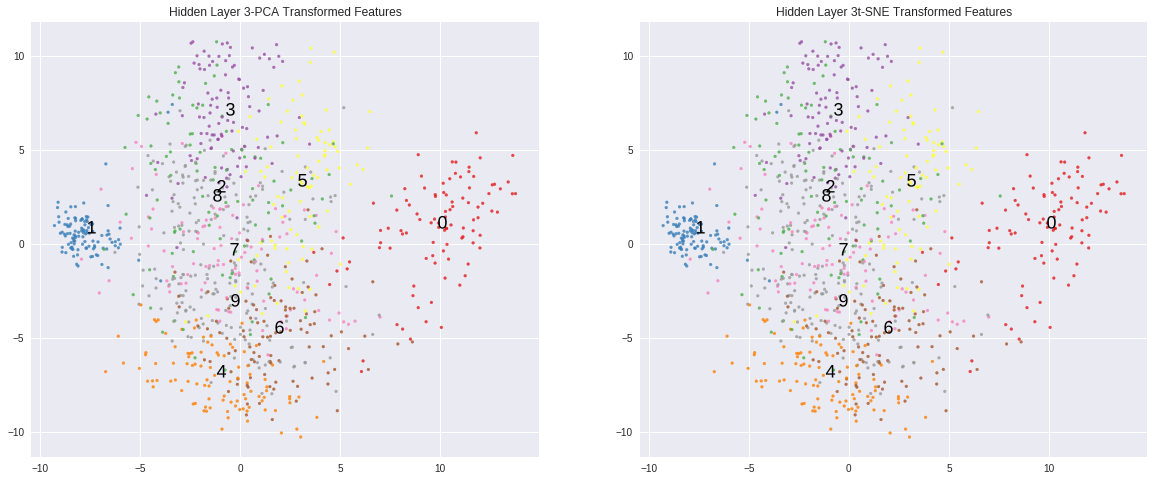

In [14]:
plot_func(H3,"Hidden Layer 3")

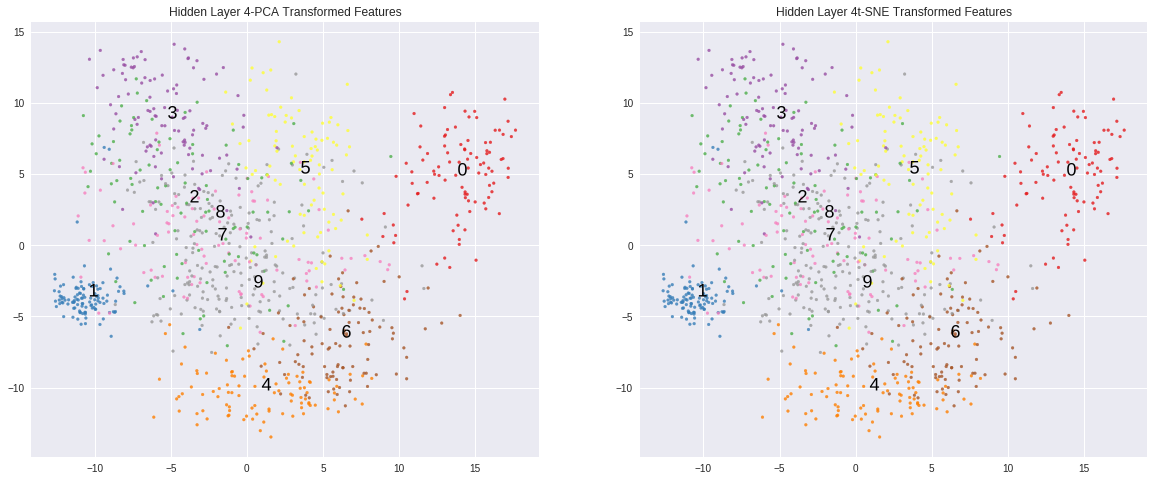

In [15]:
plot_func(H4,"Hidden Layer 4")

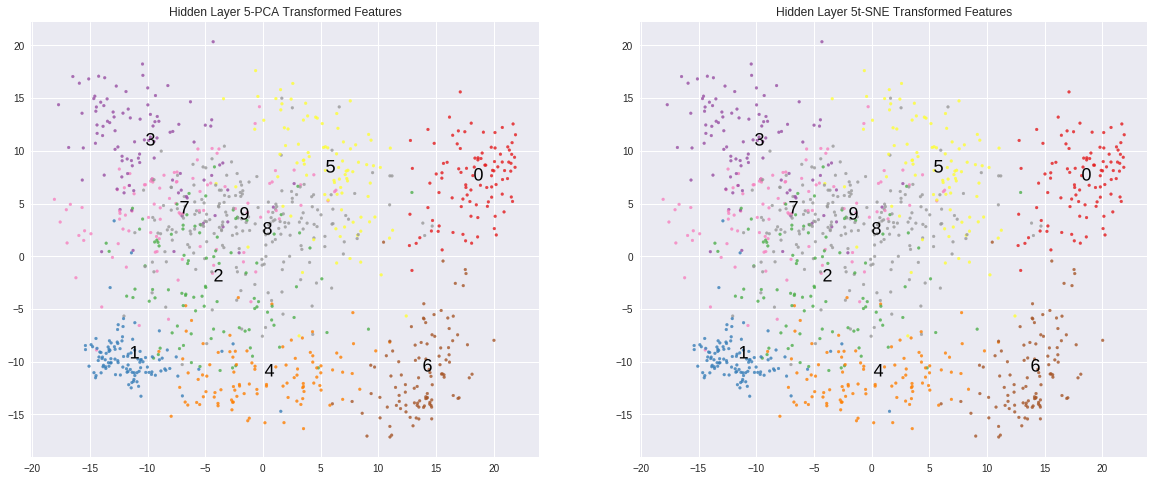

In [16]:
plot_func(H5,"Hidden Layer 5")

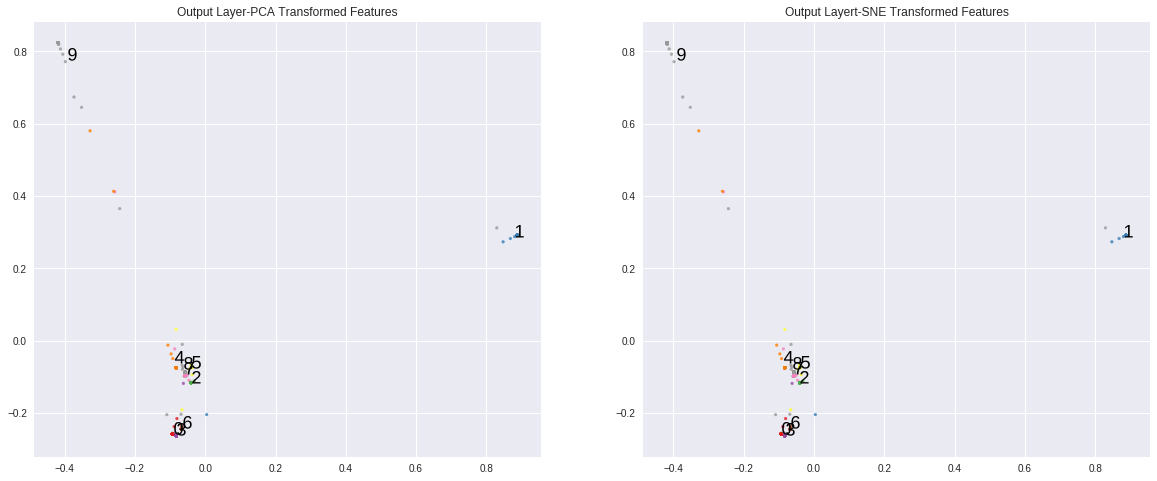

In [17]:
plot_func(output_layer,"Output Layer")

We can see that, as we move throught the layers of the DNN the data transformation become very evident. The separation between the different digits become cleared and the mean value get farther and farther apart. In the last layer the values 1 and 9 are far from each other and also rest of the numbers, from this we can presume that these 2 digits are very easy to distinguish in comparison to the others. While the other digits that are closer to one another are more difficult to distinguish. This makes sense as the other number have more complicated curves and might vary to a greater degree from person to person.